### Import your librares

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

### Load your dataset

In [15]:
df = pd.read_csv("seattle_weather.csv")
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


C:\Users\ragha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


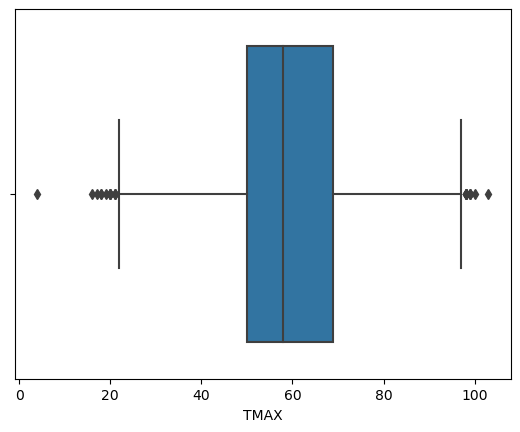

In [16]:
sns.boxplot(df["TMAX"]);

In [22]:
#TMAX

Q1 = np.percentile(df['TMAX'] , 25 , interpolation= 'midpoint')
Q3 = np.percentile(df['TMAX'] , 75, interpolation= 'midpoint')
IQR = Q3 - Q1
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)


C:\Users\ragha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


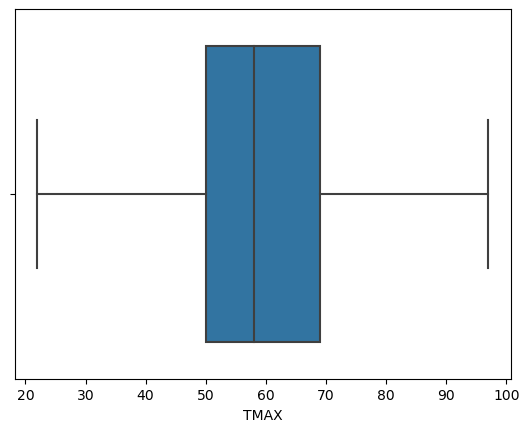

In [32]:

df.drop(df[(df['TMAX'] > Upper) | (df['TMAX'] < lower)].index, inplace=True)
sns.boxplot(df["TMAX"]);

C:\Users\ragha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


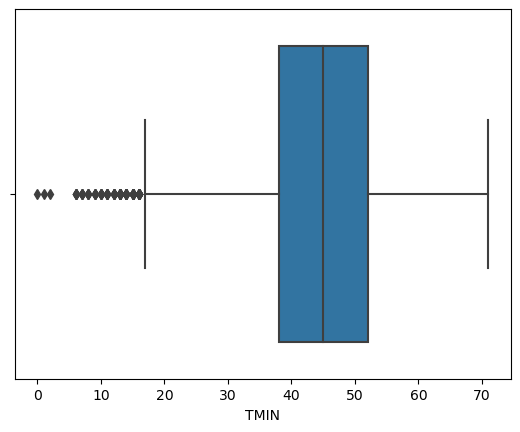

In [23]:
sns.boxplot(df["TMIN"]);

In [ ]:
#TMIN

Q1 = np.percentile(df['TMIN'] , 25, interpolation= 'midpoint')
Q3 = np.percentile(df['TMIN'] , 75, interpolation= 'midpoint')
IQR = Q3 - Q1
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)


C:\Users\ragha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


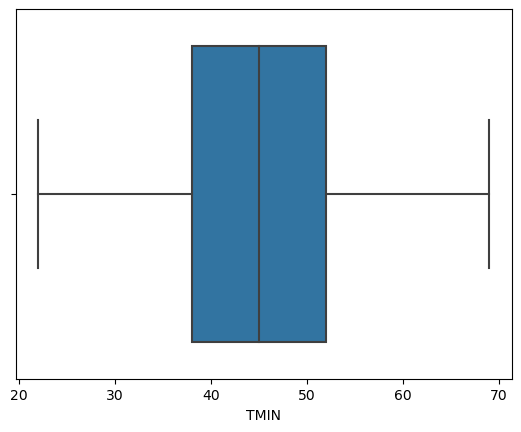

In [33]:
df.drop(df[(df['TMIN'] > Upper) | (df['TMIN'] < lower)].index, inplace=True)
sns.boxplot(df["TMIN"]);